In [141]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score


In [ ]:

# 📥 Step 1: Load dataset
df = pd.read_csv("data24.csv")
df


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [145]:
X = df.drop('Personal Loan', axis=1)  # Features
y = df['Personal Loan' ]               # Target


In [ ]:

# 🔄 Step 5: Normalize the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [147]:

# 🔀 Step 6: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [148]:



#  Step 7: Create and train a non-linear SVM model (RBF kernel)
model = SVC(kernel='rbf')  # RBF = Radial Basis Function
model.fit(X_train, y_train)


SVC()

In [149]:

# 📊 Step 8: Predict on test data
y_pred = model.predict(X_test)



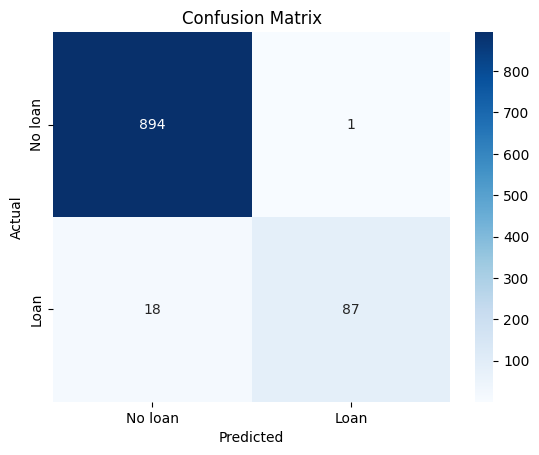

In [150]:

# 📈 Step 9: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d' , xticklabels= ['No loan' , 'Loan'] , yticklabels=['No loan' , 'Loan'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

# 📝 Optional: More evaluation metrics
print("Classification Report:")

print(classification_report(y_test, y_pred))

print("accauarcy score is :" ,accuracy_score(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.99      0.83      0.90       105

    accuracy                           0.98      1000
   macro avg       0.98      0.91      0.95      1000
weighted avg       0.98      0.98      0.98      1000

accauarcy score is : 0.981
